<h1 style="text-align: center;"><font color='green'>Prueba 2: Analizado los crímenes en la Ciudad de Nueva York</font></h1>

## <font color='green'>**Contexto**</font>

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York.
El dataset es llamado `stop_and_frisk_data` y contiene información sobre interrogaciones
y detenciones realizadas por el departamento de policía de NY en la vía pública. El
diccionario de atributos se encuentra en el archivo <font color='red'>2009</font> `SQF File Spec.xls`.

Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como
conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer
notar que los datos que estamos utilizando son un muestreo del de la cantidad de registros
reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de
entrenamiento y procesamiento que requiere el volumen de datos reales.

## <font color='green'>**Descripción de la base de datos**</font>
Las variables que componen la base se detallan a continuación.

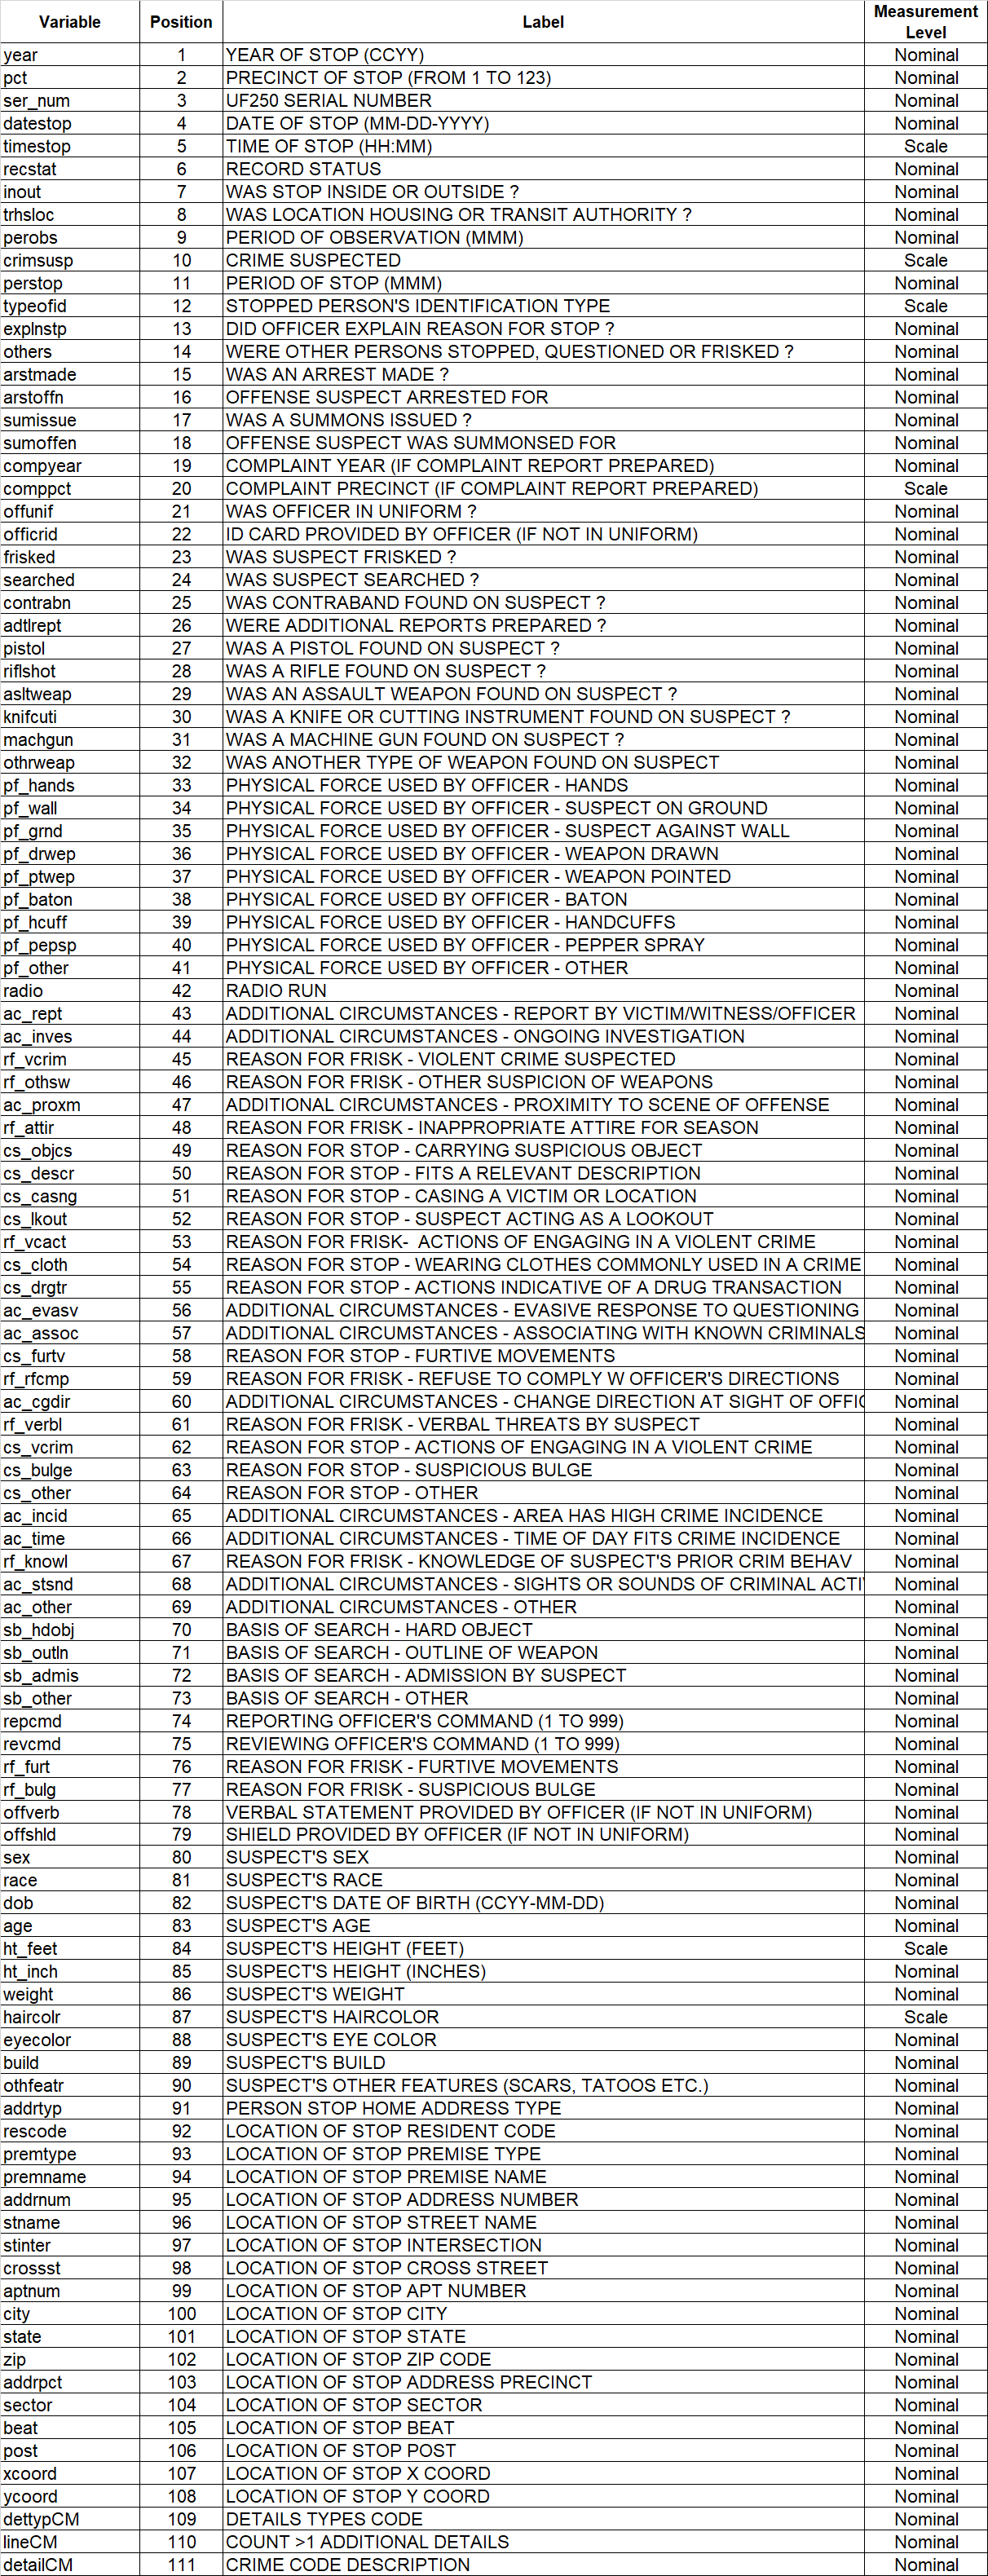

## <font color='green'>**Consideriones**</font>
- Definir el tipo de modelo a implementar para generar una predicción de arresto, así como su grilla de hiperparámetros.
- Definir la recodificación del vector objetivo para generar una predicción de acción violenta en el procedimiento.
- Implementar el script *preproc_nyc_sqf.py* para igualar la cantidad de atributos en el benchmark

## <font color='green'>**Hito 1:**</font>

#### **<font color='green'>Entendimiento del problema</font>**

Nuestra objetivo es poder predecir si un individuo fue arrestado o no, y si hubo una acción violenta o no. Como la naturaleza de lo mencionado anteriormente, es un 'Si' o un 'No', es que claramente nos encontramos con un problema de clasificación binaria, la cual, la podemos traducir en '1' si el individuo fue arrestado (o hubo una acción violenta) y '0' si no fue arrestado (o si no hubo una acción violenta). Para esto, necesitamos poder contar con variables que describan tanto el procedimiento como caracteristicas del individuo, las cuales, analisando la data, si contamos con ellas por lo que a priori  hay material para realizar el análisis.

Realizando una inspección en el diccionario, notamos que el primer fenómeno a predecir (si un individuo fue arrestado o no), encontramos que esta variable existe y se llama `arstmade`. En cambio, para el segundo fenómeno a predecir (si hubo una acción violenta o no) no encontramos una variable que esté directamente relacionada con esto, pero si hay un grupo de variables que puede explicar esta variable, las cuales son las siguientes: `pf_hands`, `pf_wall`,`pf_grnd`, `pf_drwep`, `pf_ptwep`, `pf_baton`, `pf_hcuff`, `pf_pepsp` y `pf_other`. Si alguna de estas variables tiene por valor igual a 'Yes' ('Y'), quiere decir que hubo una acción violenta, por lo que la variable objetivo del segundo fenómeno será calculada en base a estas variables mencionadas.

Para poder realizar el análisis, es necesario importar algunas librerias clásicas con las que trabajaremos, por ejemplo:
- Se importarán librerias de manipulación de datos como `pandas==1.1.5` y `numpy==1.19.5`
- librerías para realizar visualizaciones como `matplotlib==3.3.4` y `seaborn==0.11.2`
- librerías relacionadas con el modelamiento como `scikit-learn==0.24.2` junto con las métricas asociadas

#### **<font color='green'>Propuesta metodológica</font>**

Para realizar el análisis, se procederá con la siguiente metodología de trabajo:

- Se juntará el dataset de entrenamiento y de testeo en uno solo para realizar las transformaciones correspondientes una vez y luego se separarán para el modelamiento. La forma de separar la data será por la columna `year`: 
    - 2009 para entrenamienyo
    - 2010 para testeo
- Como nos encontramos frente a un problema de clasificación, debemos ocupar métricas que estén asociadas a problemas de clasificación. Ahora, dependiendo que tan balanceado estén las categorías de nuestro target, es que ocuparemos diferentes métricas para evaluar nuestro modelo y predicciones (Todas estas métricas se obtendrán de la librería `sklearn`):
    - Si nuestra variable objetivo no presenta problemas de desbalanceo, ocuparemos las siguientes métricas:
        - `accuracy` 
        - `precision`
        - `curva ROC y AUC`
    - Si nuestra variable objetivo presenta problemas de desbalanceo, ocuparemos las siguientes métricas
        - `precision`
        - `recall`
        - `f1-score`
- Para el procesamiento de los atributos, primero inspeccionaremos la cantidad de datos nulos en la data, luego veremos las relaciones que hay con la variable objetivo para inspeccionar diferencias de distribuciones para cada una de las clases (utilizando test estadisticos como un ttest), luego se inspeccionará si existen correlaciones, despues se realizarán las recodificaciones pertinentes de cada variable para trasnformarlas en variables dummy o en categorias numéricas, además se evaluará dado la volumetría de los datos (cantidad de variables), realizar algún tipo de reducción de dimensionalidad como un PCA o AF, por último se realizará un estudio econométrico para determinar las variables más relevantes  y se modelará para ver si podemos obtener un modelo mas parsimonioso con métricas similares.

#### **<font color='green'>Modelos y grillas a implementar</font>**

Por lo mencionado en los enunciado, debemos realizar al menos 3 modelos para la prediccion del procedimiento que concluirá en un arresto y al menos 5 modelos para la predicción del procedimiento policial que concluirá en alguna acción violenta. Dicho lo anterior, nuestros modelos propuestos junto los hiperparámetros a ocupar serán los siguientes:

Para el procedimiento que concluirá en un arresto:
- `LogisticRegression`: 
    - *penalty*: l1, l2, elasticnet, None
    - *C*: [0.01, 1, 100]
- `DecisionTreeClassifier`: 
    - *criterion*: gini, entropy, log_loss
    - *max_features*: None, log2, sqrt
    - *max_depth*: entre 1 y 20
- `RandomForestClassifier`:
    - *max_features*: None, log2, sqrt
    - *n_estimators*: Evaluar entre 20 y 1000 en pasos de 50


Para el procedimiento policial que concluirá en alguna acción violenta:
- `LogisticRegression`:
    - *penalty*: l1, l2, elasticnet, None
    - *C*: [0.01, 1, 100]
- `RandomForestClassifier`:
    - *max_features*: None, log2, sqrt.
    - *n_estimators*: Evaluar entre 20 y 1000 en pasos de 50
- `SVC`:
    - *C*: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    - *gamma*: [0.0001, 0.001, 0.01, 0.1, 1, 10]
    - *cv*: 10
- `GradientBoostingClassifier`:
    - *learning_rate*: [0.01, 0.1, 0.5],
    - *n_estimators*: [50, 100, 500, 1000, 2000],
    - *subsample*: [0.1,0.5,0.9]
- `VotingClassifier`:
    - *estimators*: los mejores 4 modelos anteriores con los mejores hiperparámetros encontrados

además, en caso de ameritarlo, se ocupará el parámetro `class_weight` si tenemos nuestro dataset desbalanceado.

#### **<font color='green'>Estudio del vector objetivo</font>**

Para el estudio de la variable objetivo, primero cargaremos las librerias necesarias y el dataset.Despues, nos centraremos en el estudio de los dos fenomentos de interes, que corresponde a la variable `arstmade` y al set de datos que corresponde al tipo de uso de fuerza de la policia descrita anteriormenter.

In [1]:
# Importamos las librerías clasicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funciones import porcentaje_null
import warnings

# Para filtrar los warnings
warnings.filterwarnings('ignore')

# Cargamos los datos de entrenamiento y de test
df_train = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
df_test = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')

# Juntamos ambos dataset
df = pd.concat([df_train, df_test])
df

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2.0,MISD,...,,60,I,,,989382,155162,CM,1,20
6009,2010,75,15797,7302010,10,A,O,P,1.0,ROBBERY,...,,75,A,,,1012757,186018,CM,1,85
6010,2010,123,830,4302010,1630,A,O,P,3.0,GLA,...,,123,E,,,933868,138600,CM,1,46
6011,2010,115,13122,11232010,2100,1,O,P,1.0,FELONY,...,,115,E,,,1014722,214388,CM,1,85


Ahora, revisamos los vectores objetivos:

- `Procedimiento concluirá en un arresto o no:` la variable que indica si el procedimiento concluirá en un arresto o no es `arstmade`.

N    0.940124
Y    0.059876
Name: arstmade, dtype: float64

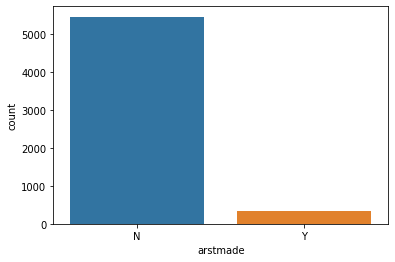

In [2]:
# Procedimiento que concluirá en un arresto, hace referencia a la variable arstmade, por lo que inspeccionamos esta variable:

# Graficamos la cantidad de datos por categoria
sns.countplot(data=df_train, x='arstmade')

# Revisamos la proporcion entre estas categorias
df_train['arstmade'].value_counts(normalize=True)

Claramente, se ve un serio problema de desbalanceo, ya que nuestra clase de interes `'Y'` es la minoritaria, por lo que a futuro tendremos que aborar este problema aplicando técnicas para tratar el desbalanceo, como un *subsampling*, *oversampling*, o mixto.

- `Procedimiento policial concluirá en alguna acción violenta:` Esta variable debe construirse, con las variables que indican si el oficial utilizo fuerza fisica. Las variables que indican lo anterior son: `pf_hands`, `pf_wall`,`pf_grnd`, `pf_drwep`, `pf_ptwep`, `pf_baton`, `pf_hcuff`, `pf_pepsp` y `pf_other`

N    0.75
Y    0.25
Name: violence, dtype: float64

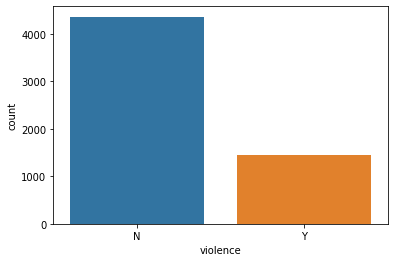

In [3]:
# La accion violenta será si es que alguna de estas variables es 1

# Obtenemos el nombre de las variables de interés
violence = ['pf_hands', 'pf_wall','pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other']

# Creamos el vector objetivo
df['violence'] = df[violence].replace(['Y','N'],[1,0]).sum(axis=1)
df['violence'] = np.where(df['violence']>0,'Y','N')

# Graficamos la cantidad de datos por categoria
sns.countplot(data=df[df['year']==2009], x='violence')

# Revisamos la proporcion entre estas categorias
df[df['year']==2009]['violence'].value_counts(normalize=True)

Al igual que la otra variable, tenemos un problema de desbalanceo de nuestro target, y nustra clase de interes `'Y'` es la clase minoritaria, por lo que a futuro tendremos que tratar este desbalanceo aplicando técnicas que nos permitan resolver o mitigar este problema.

#### **<font color='green'>Estudio de datos nulos</font>**

Para ver la cantidad de nulos en el dataset, llamaremos a la función creada llamada `porcentaje_null` la cual reporta la cantidad del datos perdidos por columna y el porcentaje que representa

In [4]:
porcentaje_null(df)

          N_NaN  Porcentaje
premname      1      0.0001
stinter       1      0.0001
year          0      0.0000
sb_admis      0      0.0000
dob           0      0.0000
...         ...         ...
pf_wall       0      0.0000
pf_hands      0      0.0000
othrweap      0      0.0000
machgun       0      0.0000
violence      0      0.0000

[112 rows x 2 columns]


observamos que las variables que poseen datos perdidos son `premname` y `stinter` en terminos de porcentaje es demasiado pequeño, por lo que para simplificar el análisis, eliminaremos los registros con NaN:

In [5]:
df.dropna(inplace=True)

#### **<font color='green'>Recodificación del vector objetivo</font>**

Como nos encontramos en un problema de clasificación binaria, debemos recodificar las variables como 0 y 1, dejando como 1 indicaco que si se realizó la acción:

- Procedimiento concluirá en un arresto o no:

In [6]:
df['arstmade'] = np.where(df['arstmade']=='Y',1,0)

- Procedimiento policial concluirá en alguna acción violenta:

In [7]:
df['violence'] = np.where(df['violence']=='Y',1,0)